In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Stock price prediction data/aapl.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-22 00:00:00+00:00,177.00,177.78,176.60,177.30,26023683,42.022247,42.207430,41.927281,42.093471,104094732,0.0,1.0
1,AAPL,2018-01-23 00:00:00+00:00,177.04,179.44,176.82,177.30,31702531,42.031743,42.601536,41.979512,42.093471,126810124,0.0,1.0
2,AAPL,2018-01-24 00:00:00+00:00,174.22,177.30,173.20,177.25,50562257,41.362236,42.093471,41.120074,42.081600,202249028,0.0,1.0
3,AAPL,2018-01-25 00:00:00+00:00,171.11,174.95,170.53,174.51,39661804,40.623879,41.535548,40.486179,41.431086,158647216,0.0,1.0
4,AAPL,2018-01-26 00:00:00+00:00,171.51,172.00,170.06,172.00,37121805,40.718845,40.835178,40.374595,40.835178,148487220,0.0,1.0


In [4]:
pd.to_datetime(df['date']).dt.year.unique()

array([2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [5]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
df1 = df['close']

In [7]:
df1

0       177.00
1       177.04
2       174.22
3       171.11
4       171.51
         ...  
1251    130.73
1252    133.49
1253    133.41
1254    134.76
1255    135.94
Name: close, Length: 1256, dtype: float64

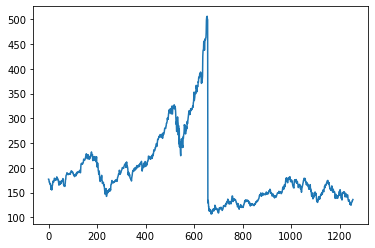

In [8]:
plt.plot(df1)

In [9]:
## since LSTM are very sensitive to scale of the data, so we will scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(1256, 1)

In [11]:
df1

array([[0.17572949],
       [0.17582968],
       [0.16876644],
       ...,
       [0.06654978],
       [0.06993112],
       [0.07288666]])

In [12]:
train_size = int(len(df1)*0.7)
test_size = len(df1) - train_size

In [13]:
train_data = df1[:train_size,:]
test_data = df1[train_size:, :]

In [14]:
train_data.shape

(879, 1)

In [15]:
test_data.shape

(377, 1)

In [16]:
### creating a dataset where the values at timestamp t, t+1, t+2 acts as independent features and value at t+3 acts as 
### dependent feature. This will happen if your time stand is 3.

def create_dataset(dataset, time_step=3):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i: (i+time_step), 0]
        b = dataset[i+time_step,0]
        X.append(a)
        y.append(b)
    return np.array(X,dtype='float32'), np.array(y, dtype='float32')

In [17]:
X_train, y_train = create_dataset(train_data, time_step=100)
X_test, y_test = create_dataset(test_data, time_step=100)

In [20]:
print(X_train)
print(X_train.shape)

[[0.1757295  0.17582968 0.16876644 ... 0.21137132 0.21400125 0.21004383]
 [0.17582968 0.16876644 0.16097683 ... 0.21400125 0.21004383 0.2102943 ]
 [0.16876644 0.16097683 0.1619787  ... 0.21004383 0.2102943  0.2053851 ]
 ...
 [0.04798998 0.04763933 0.04636193 ... 0.09432686 0.09718221 0.1059737 ]
 [0.04763933 0.04636193 0.03544145 ... 0.09718221 0.1059737  0.10429555]
 [0.04636193 0.03544145 0.03611772 ... 0.1059737  0.10429555 0.09906074]]
(779, 100)


In [21]:
print(y_train)
print(y_train.shape)

[2.10294306e-01 2.05385104e-01 2.05134630e-01 1.97495297e-01
 1.99524105e-01 1.96919218e-01 1.95566684e-01 1.88678771e-01
 1.94339380e-01 1.93663120e-01 1.97019413e-01 1.96042582e-01
 2.01227307e-01 1.93061993e-01 1.96768939e-01 2.03206018e-01
 2.09743261e-01 2.09167182e-01 2.02980593e-01 2.10870385e-01
 2.11621791e-01 2.10569814e-01 2.11922348e-01 2.09292427e-01
 2.12999374e-01 2.11897314e-01 2.12323099e-01 2.15804636e-01
 2.20363185e-01 2.18835309e-01 2.10745141e-01 2.08065122e-01
 2.09016904e-01 2.37094551e-01 2.51847208e-01 2.53350019e-01
 2.56055117e-01 2.51145899e-01 2.51496553e-01 2.55579203e-01
 2.52197862e-01 2.55554169e-01 2.57758290e-01 2.58985609e-01
 2.66700059e-01 2.77370065e-01 2.72060126e-01 2.71008134e-01
 2.71033198e-01 2.72135258e-01 2.73813397e-01 2.78271765e-01
 2.82680035e-01 2.90895432e-01 2.96030045e-01 3.02542269e-01
 3.04370701e-01 3.00638705e-01 2.91195989e-01 2.86687553e-01
 2.79248595e-01 2.93074518e-01 2.86111444e-01 2.99486548e-01
 2.93049455e-01 2.781214

### IMPORTANT RESHAPE FOR LSTM INPUT

In [22]:
## reshaping the input into 3d shape: 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

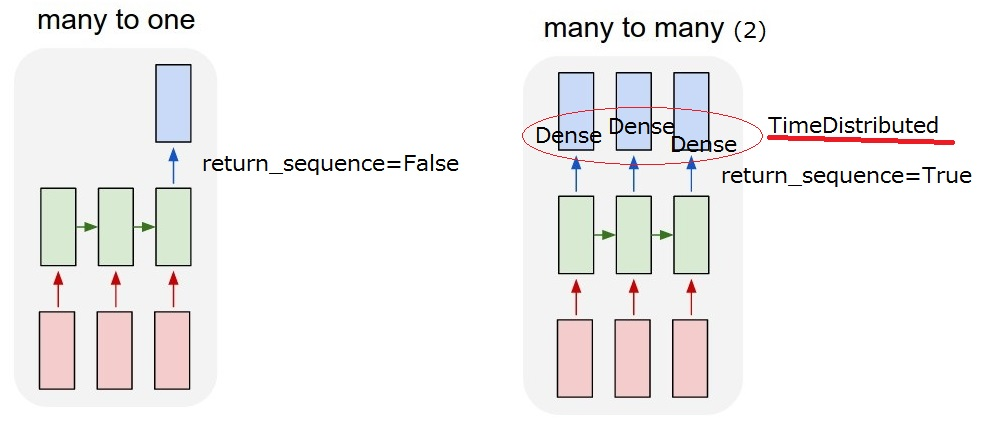

In [50]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_23 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_24 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 11s 166ms/step - loss: 0.0248 - val_loss: 0.0025
Epoch 2/10
25/25 [==============================] - 3s 112ms/step - loss: 0.0102 - val_loss: 4.2853e-04
Epoch 3/10
25/25 [==============================] - 4s 158ms/step - loss: 0.0085 - val_loss: 5.5453e-04
Epoch 4/10
25/25 [==============================] - 4s 147ms/step - loss: 0.0080 - val_loss: 0.0012
Epoch 5/10
25/25 [==============================] - 3s 137ms/step - loss: 0.0066 - val_loss: 8.2565e-04
Epoch 6/10
25/25 [==============================] - 3s 136ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 7/10
25/25 [==============================] - 3s 138ms/step - loss: 0.0048 - val_loss: 3.5317e-04
Epoch 8/10
25/25 [==============================] - 3s 135ms/step - loss: 0.0043 - val_loss: 5.2397e-04
Epoch 9/10
25/25 [==============================] - 3s 138ms/step - loss: 0.0038 - val_loss: 3.9036e-04
Epoch 10/10
25/25 [==============================] - 3s 137ms/step - loss: 

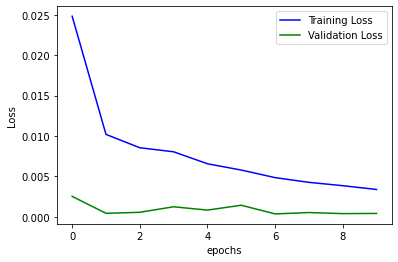

In [52]:
plt.plot(history.history['loss'],color='blue',label='Training Loss')
plt.plot(history.history['val_loss'],color='green',label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 37ms/step


In [54]:
## inverse scaling the predictions to get the original 'close' value
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

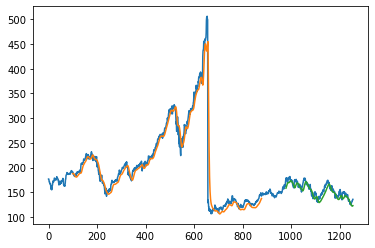

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
len(test_data)

377

In [74]:
x_input=test_data[277:].reshape(1,-1)
x_input.shape

(1, 100)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.12303068252974325,
 0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,

In [76]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.042364757508039474], [0.04375259205698967], [0.04429323226213455], [0.043933719396591187], [0.04279793053865433], [0.0410737581551075], [0.038947943598032], [0.036575280129909515], [0.03406962379813194], [0.031506575644016266], [0.028931353241205215], [0.02636757120490074], [0.023825019598007202], [0.02130553312599659], [0.018807008862495422], [0.016325846314430237], [0.013858316466212273], [0.011401165276765823], [0.008951747789978981], [0.006508050952106714], [0.004068516660481691], [0.0016319658607244492], [-0.000802542082965374], [-0.003235757350921631], [-0.005668296478688717], [-0.008100640028715134], [-0.010533172637224197], [-0.012966196984052658], [-0.015399863943457603], [-0.017834298312664032]]


In [88]:
train_day = np.arange(0,1157)
test_days=np.arange(1157,1257)
days_30_after_test=np.arange(1257,1287)

In [102]:
df1.shape

(1256, 1)

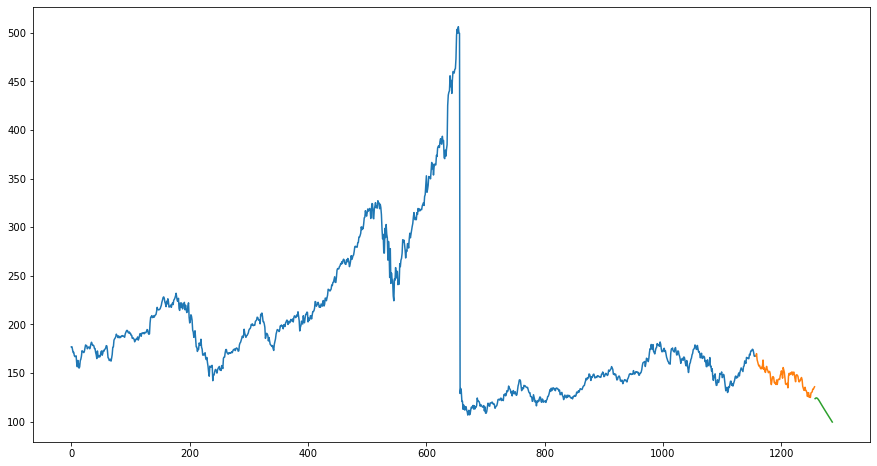

In [103]:
plt.figure(figsize=(15,8))
plt.plot(train_day,scaler.inverse_transform(df1[:1157]))
plt.plot(test_days,scaler.inverse_transform(df1[1156:1257]))
plt.plot(days_30_after_test,scaler.inverse_transform(lst_output))